In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import colormaps as cmaps

In [2]:
def load_df(path):
    df = pd.read_csv(path)
    initial_rows = np.where(df['epoch'] == 0)[0]
    df.drop(index=initial_rows, inplace=True)
    return df

k100_df = load_df("./rep_100_losses_by_epoch.csv")
k250_df = load_df("./rep_250_losses_by_epoch.csv")
k500_df = load_df("./rep_500_losses_by_epoch.csv")
k1000_df = load_df("./rep_1000_losses_by_epoch.csv")
k2500_df = load_df("./rep_2500_losses_by_epoch.csv")
k5000_df = load_df("./rep_5000_losses_by_epoch.csv")
k10000_df = load_df("./rep_10000_losses_by_epoch.csv")

k10000_df.drop(k10000_df[k10000_df['run'] >= 10].index, inplace=True)

k10000_df

,epoch,loss,reconstruction_loss,divergence_loss,stoicheometry_loss,test_loss,test_reconstruction_loss,test_divergence_loss,test_stoicheometry_loss,epochs,...,refresh_data_on,save_losses_on,test_dataset,test_size,save_test_min,weight_decay,beta_S,main_folder,losses_file,run
1,1,3055.347485,2999.856120,55.491397,0.0,3432.292670,3403.661320,28.631344,0.0,32,...,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,True,0,0.0,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,0
2,2,2581.554780,2521.193775,60.360983,0.0,3322.068925,3293.854445,28.214456,0.0,32,...,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,True,0,0.0,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,0
3,3,2246.709885,2179.137695,67.572178,0.0,3274.200855,3243.681685,30.519172,0.0,32,...,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,True,0,0.0,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,0
4,4,2003.860580,1931.664105,72.196450,0.0,3245.460020,3213.155405,32.304593,0.0,32,...,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,True,0,0.0,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,0
5,5,1819.802740,1745.615600,74.187140,0.0,3226.817390,3193.698470,33.118925,0.0,32,...,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,True,0,0.0,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,27,819.970844,771.994216,47.976629,0.0,3261.972118,3236.701308,25.270786,0.0,32,...,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,True,0,0.0,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,9
252,28,806.627330,759.064832,47.562494,0.0,3266.266382,3241.191734,25.074663,0.0,32,...,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,True,0,0.0,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,9
253,29,793.509248,746.304115,47.205129,0.0,3271.160791,3246.253085,24.907704,0.0,32,...,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,True,0,0.0,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,9
254,30,782.602177,735.768445,46.833729,0.0,3275.685153,3250.930477,24.754696,0.0,32,...,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,True,0,0.0,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,9


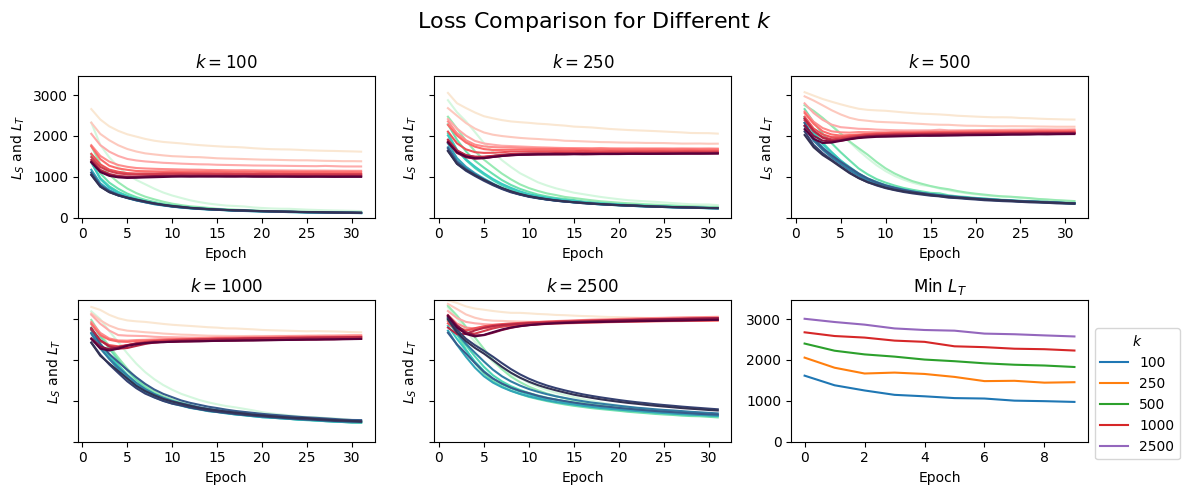

In [5]:
fig, axs = plt.subplots(2, 3, figsize=(12,5))

axs = sum([list(ax) for ax in axs], start=[])

max_loss = max([
    df["test_loss"].max()
    for df in [k250_df, k500_df, k2500_df]
])

n_runs = 10



def plot(kdf, ax1, k, axf, remove_y_ticks=True, ):
    loss_colors = cmaps.bl_11.discrete(10).colors
    test_colors = list(reversed(cmaps.fushia_red_pink1.discrete(10).colors))

    for run in kdf['run'].unique():
        run_df = kdf[kdf['run'] == run]
        ax1.plot(run_df['epoch'], run_df["loss"], label=run, color=loss_colors[run])
        ax1.plot(run_df['epoch'], run_df["test_loss"], label=run, color=test_colors[run])


    ax1.set_ylabel("$L_S$ and $L_T$")
    ax1.set_title(f"$k={k}$")
    ax1.set_ylim([0, max_loss])
    ax1.set_xlabel("Epoch")

    #loss_matrix = kdf.set_index(['run', 'epoch'])['test_loss'].unstack().values
    #axs[1].imshow(loss_matrix, cmap=cmaps.balance)#, vmin=0, vmax=max_loss)
    #axs[1].set_xlabel("Epoch")
    
    axf.plot(kdf['run'].unique(), kdf.groupby('run')['test_loss'].min(), label=k)
    axf.set_ylim([0, max_loss])

    if remove_y_ticks:
        ax1.set_yticklabels([])

plot(k100_df,  axs[0], 100 , axs[5], remove_y_ticks=False)
plot(k250_df,  axs[1], 250 , axs[5])
plot(k500_df,  axs[2], 500 , axs[5])
plot(k1000_df, axs[3], 1000, axs[5])
plot(k2500_df, axs[4], 2500, axs[5])
#plot(k5000_df, ax6, 5000)
#plot(k10000_df, ax7, 10000)

axs[5].legend(title="$k$", bbox_to_anchor=(1, 0.85))
axs[5].set_title("Min $L_T$")
axs[5].set_xlabel("Epoch")

fig.suptitle("Loss Comparison for Different $k$", fontsize=16)
fig.tight_layout()

fig.savefig("./test_losses.png", dpi=400)
